In [2]:
import numpy as np
import mpmath as mat
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from scipy import ndimage

In [3]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [4]:
# Script used for finding the toe as defined via SWAN

# k = 0
# i = 2
# work_path = "../../Schenarios/Scenario_"+str(k+1)+"/SWAN/Output/"
# df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(i+1)+".tab",sep='\s+',skiprows=7, names= head)

# plt.plot([x3[0],x3[-1]],[-df.Depth+surge_tide[k],-df.Depth+surge_tide[k]])

# plt.plot(x3,bot_list[i][bound[0][i]:bound[1][i]])
# df.Depth
# plt.plot([x1,x2,x3][i], bot_list[i][bound[0][i]:bound[1][i]])

In [20]:
surge_tide = [3.217853397,3.129784897,3.011694997,2.882887097,2.818109797,2.674751097,2.506357897,2.938605197]
dirs_norm = 45, 60, 63


head = '"TestName"', '"WaveDirection"', '"FrontWaterDepth"', '"ToeWaveHeight"', '"ToeWavePeriod"', '"ToeWaterDepth"', '"ToeWidth"', '"Roughness"', '"DownwardSlope"', '"UpwardSlope"', '"CrestFreeboard"', '"BermWidth"', '"BermWaterDepth"', '"BermSlope"', '"ArmourFreeboard"', '"CrestWidth"'
export_list = [head]

# bound = [5947+4,6522+8,3325+7],[5984,6569,3355]
bound = [225,226,228],[265,280,260]

x1 = np.arange(0, bound[1][0] - bound[0][0],1)*2
x2 = np.arange(0, bound[1][1] - bound[0][1],1)*2
x3 = np.arange(0, bound[1][2] - bound[0][2],1)*2

d0 = np.zeros(3)
d1 = np.zeros(3)

bot_list = []
Rc = np.zeros([8,3])
for k in range(8):
    for i in range(3):# i = loc - 1
        botfile = 'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Code/SWASH/1D/SWASH1D_loc'+str(i+1)+'.bot'
        bot_list.append(-np.flip(np.loadtxt(botfile)))
#         plt.plot([x1,x2,x3][i],bot_list[i][bound[0][i]:bound[1][i]],label=i)
#         plt.legend()
        d0[i] = bot_list[i][bound[0][i]:bound[1][i]][-1]
        d1[i] = bot_list[i][bound[0][i]:bound[1][i]][0]
#         d1[1] = 8.2# I1 location correction
        l = [x1,x2,x3][i][-1]
        angle = np.arctan((d1[i] - d0[i])/l)
        cot = float(mat.cot(angle))
        
#         if (k==0):
#             plt.plot(np.arange(len(bot_list[i][bound[0][i]:bound[1][i]])),bot_list[i][bound[0][i]:bound[1][i]],label=i+1)
        
        if (k!=7):
            work_path = "../../Schenarios/Scenario_"+str(k+1)+"/SWAN/Output/"
        else:
            work_path = "../../Schenarios/Scenario_"+str(k+1)+"_alt/SWAN/Output/"
        project_name = "Eastbourne_01"

        head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(i+1)+".tab",sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(i+1)+".tab",sep='\s+',skiprows=7, names= head)

        TestName = '"Loc'+str(i+1)+' schenario'+str(k+1)+'"'
        if (i==1):
            TestName = '"Loc I2 schenario'+str(k+1)+'"'
        WaveDirection = np.abs(df.Dir[0] - (90+dirs_norm[i]))
        FrontWaterDepth = surge_tide[k] - d0[i]
#         print(d1[i])
        ToeWaveHeight = df.Hsig[0]
        ToeWavePeriod = df.Tm_10[0]
        ToeWaterDepth = int(FrontWaterDepth*1e10)/1e10
        ToeWidth = 0
        Roughness = 0.9# mention this
        DownwardSlope = cot
        UpwardSlope = cot
        CrestFreeboard = d1[i] - surge_tide[k]
        BermWidth = 0
        BermWaterDepth = 0#int((surge_tide[k] - d0[i])*1e10)/1e10
        BermSlope = 0
        ArmourFreeboard = CrestFreeboard
        CrestWidth = 0
        Rc[k,i] = CrestFreeboard
        entry = TestName, WaveDirection, FrontWaterDepth, ToeWaveHeight, ToeWavePeriod, ToeWaterDepth, ToeWidth, Roughness, DownwardSlope, UpwardSlope, CrestFreeboard, BermWidth, BermWaterDepth, BermSlope, ArmourFreeboard, CrestWidth
        export_list.append(entry)
np.savetxt('overtop_input_new_I2.csv',export_list,delimiter=',', fmt="%s")
for i in range(len(export_list[0])):
    print(export_list[0][i],export_list[1][i])

"TestName" "Loc1 schenario1"
"WaveDirection" 36.32899999999999
"FrontWaterDepth" 5.776824619157432
"ToeWaveHeight" 3.11103
"ToeWavePeriod" 10.6914
"ToeWaterDepth" 5.7768246191
"ToeWidth" 0
"Roughness" 0.9
"DownwardSlope" 9.239262072771174
"UpwardSlope" 9.239262072771174
"CrestFreeboard" 2.665408038131516
"BermWidth" 0
"BermWaterDepth" 0
"BermSlope" 0
"ArmourFreeboard" 2.665408038131516
"CrestWidth" 0


In [23]:
Rc

array([[2.66540804, 3.64920968, 2.70336713],
       [2.75347654, 3.73727818, 2.79143563],
       [2.87156644, 3.85536808, 2.90952553],
       [3.00037434, 3.98417598, 3.03833343],
       [3.06515164, 4.04895328, 3.10311073],
       [3.20851034, 4.19231198, 3.24646943],
       [3.37690354, 4.36070518, 3.41486263],
       [2.94465624, 3.92845788, 2.98261533]])

In [ ]:
# head = '"TestName"', '"WaveDirection"', '"FrontWaterDepth"', '"ToeWaveHeight"', '"ToeWavePeriod"', '"ToeWaterDepth"', '"ToeWidth"', '"Roughness"', '"DownwardSlope"', '"UpwardSlope"', '"CrestFreeboard"', '"BermWidth"', '"BermWaterDepth"', '"BermSlope"', '"ArmourFreeboard"', '"CrestWidth"'

# TestName = '"Loc'+str(i+1)+'"'
# WaveDirection = df.Dir[0] - 90
# FrontWaterDepth = surge_tide[k] - d0[i]
# ToeWaveHeight = df.Hsig[0]
# ToeWavePeriod = df.Period[0]
# ToeWaterDepth = int(FrontWaterDepth*1e10)/1e10
# ToeWidth = 0
# Roughness = 1
# DownwardSlope = cot
# UpwardSlope = cot
# CrestFreeboard = d1[i] - surge_tide[k]
# BermWidth = 0
# BermWaterDepth = int((surge_tide[k] - d0[i])*1e10)/1e10
# BermSlope = 0
# ArmourFreeboard = CrestFreeboard
# CrestWidth = 2.0

# entry = TestName, WaveDirection, FrontWaterDepth, ToeWaveHeight, ToeWavePeriod, ToeWaterDepth, ToeWidth, Roughness, DownwardSlope, UpwardSlope, CrestFreeboard, BermWidth, BermWaterDepth, BermSlope, ArmourFreeboard, CrestWidth
# # export = head, entry1, entry2, entry3

# # export
# entry

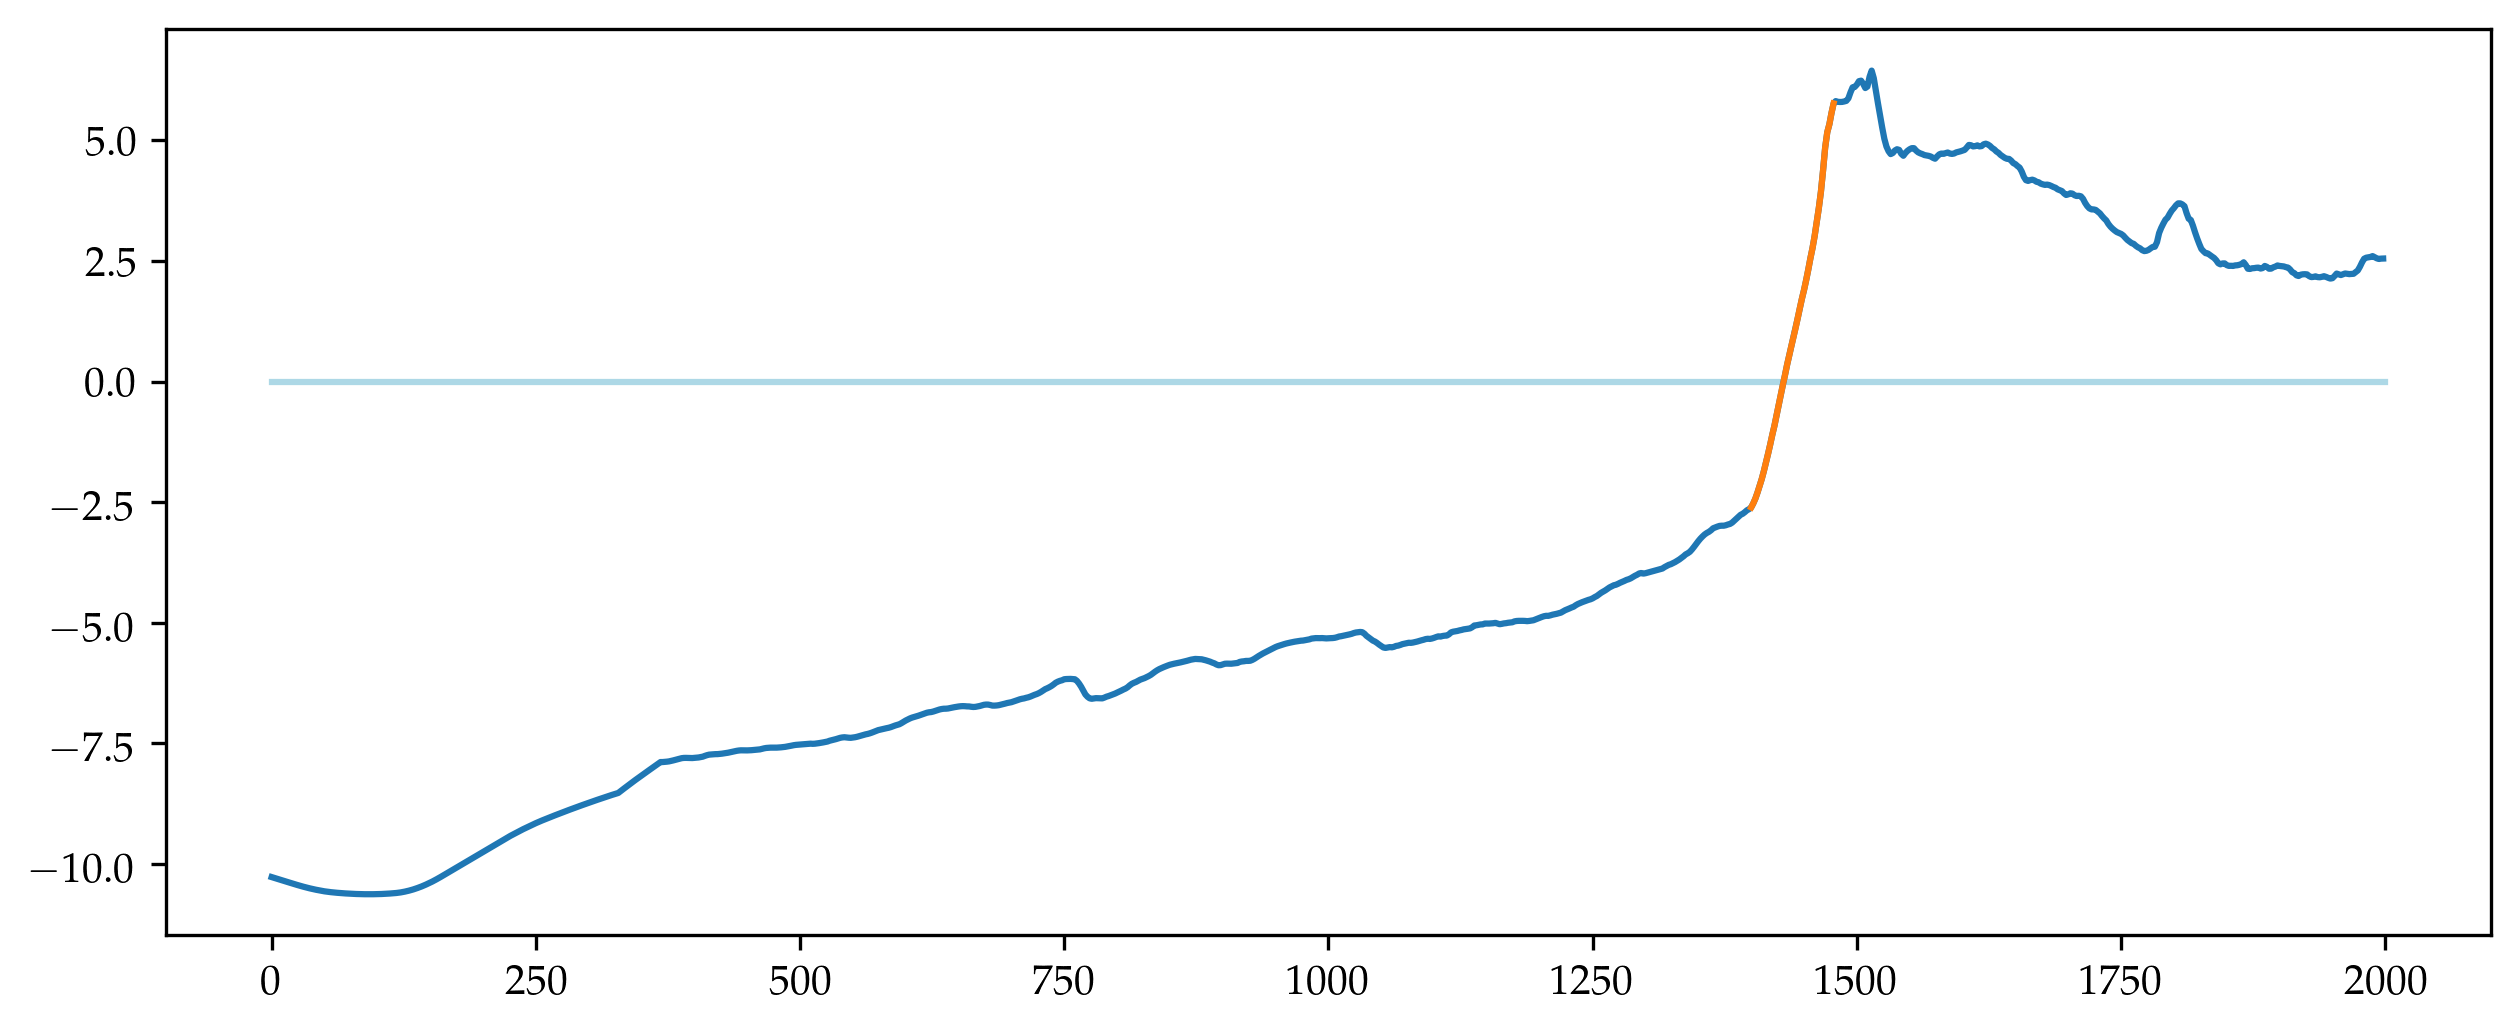

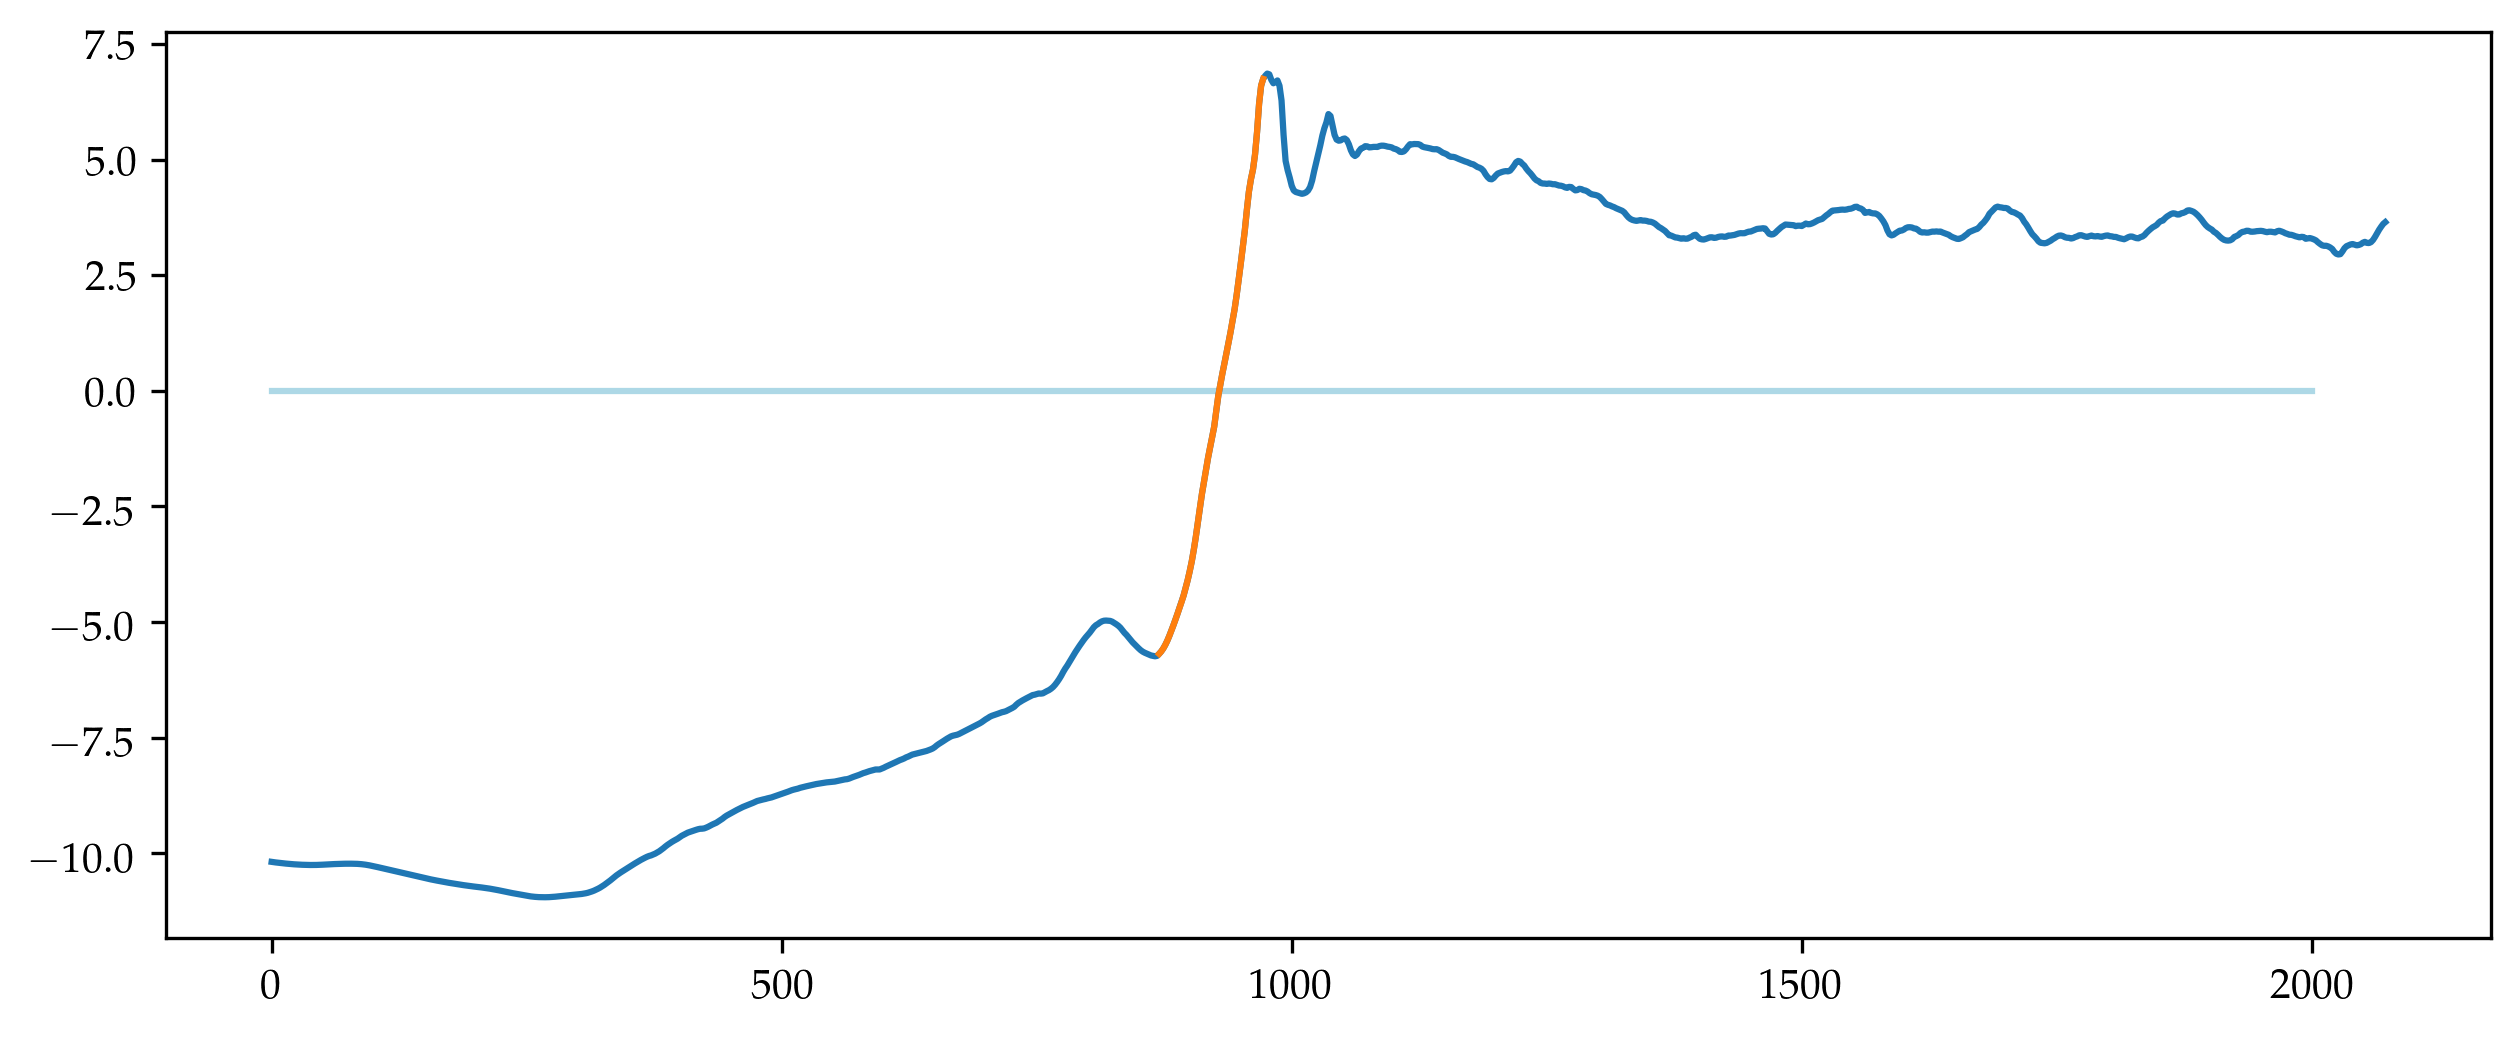

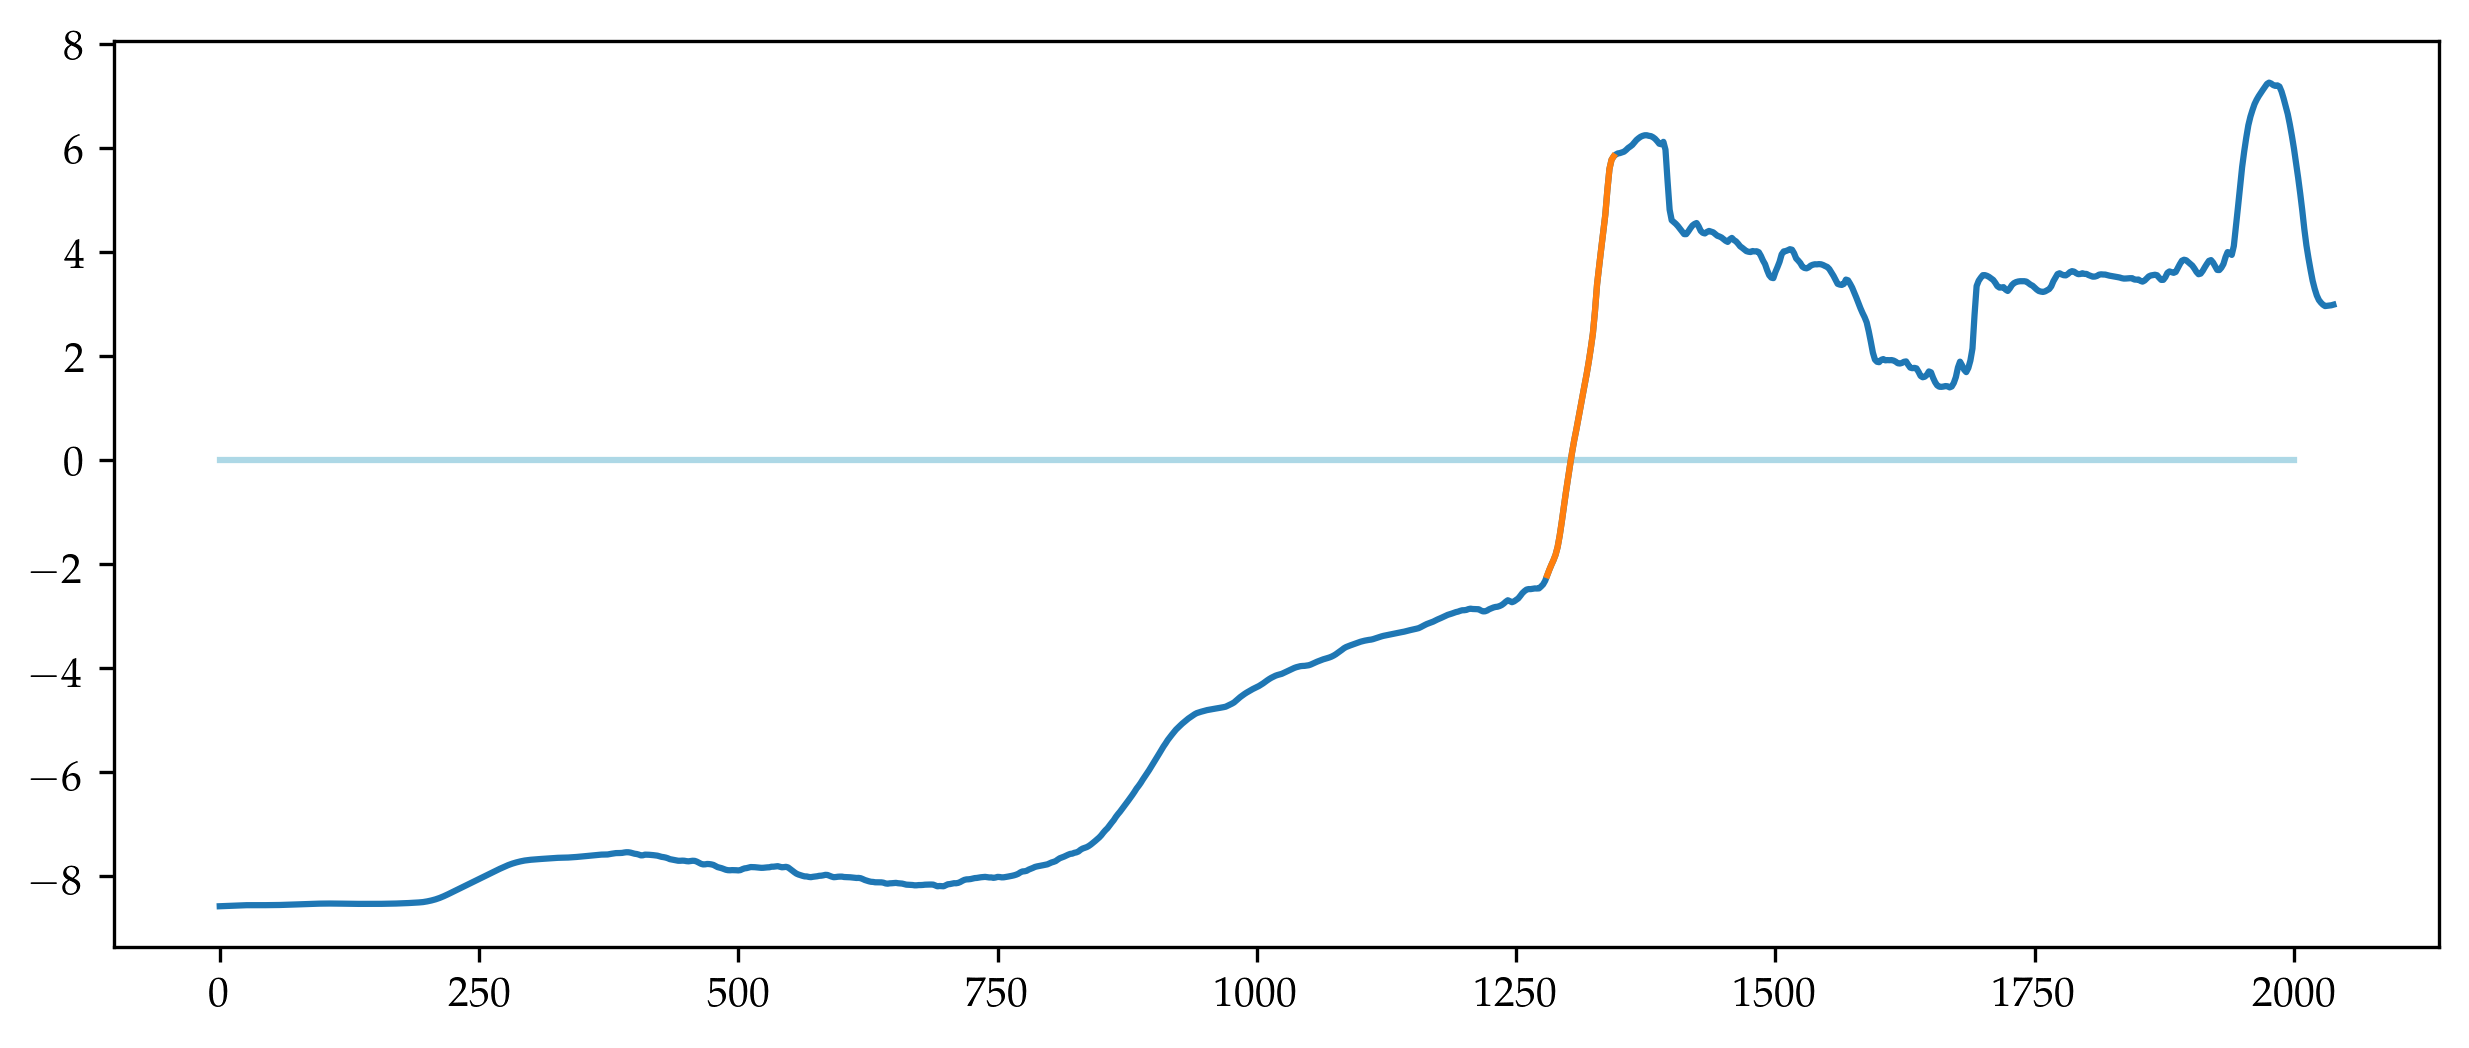

In [6]:
for i in range(3):
    plt.figure(figsize=[10,4])
    plt.plot([0,2000],[0,0],color="lightblue")
    plt.plot(np.arange(len(bot_list[i]))*2,-bot_list[i])
    plt.plot([x1,x2,x3][i]+bound[0][i]*2, -bot_list[i][bound[0][i]:bound[1][i]])

6485

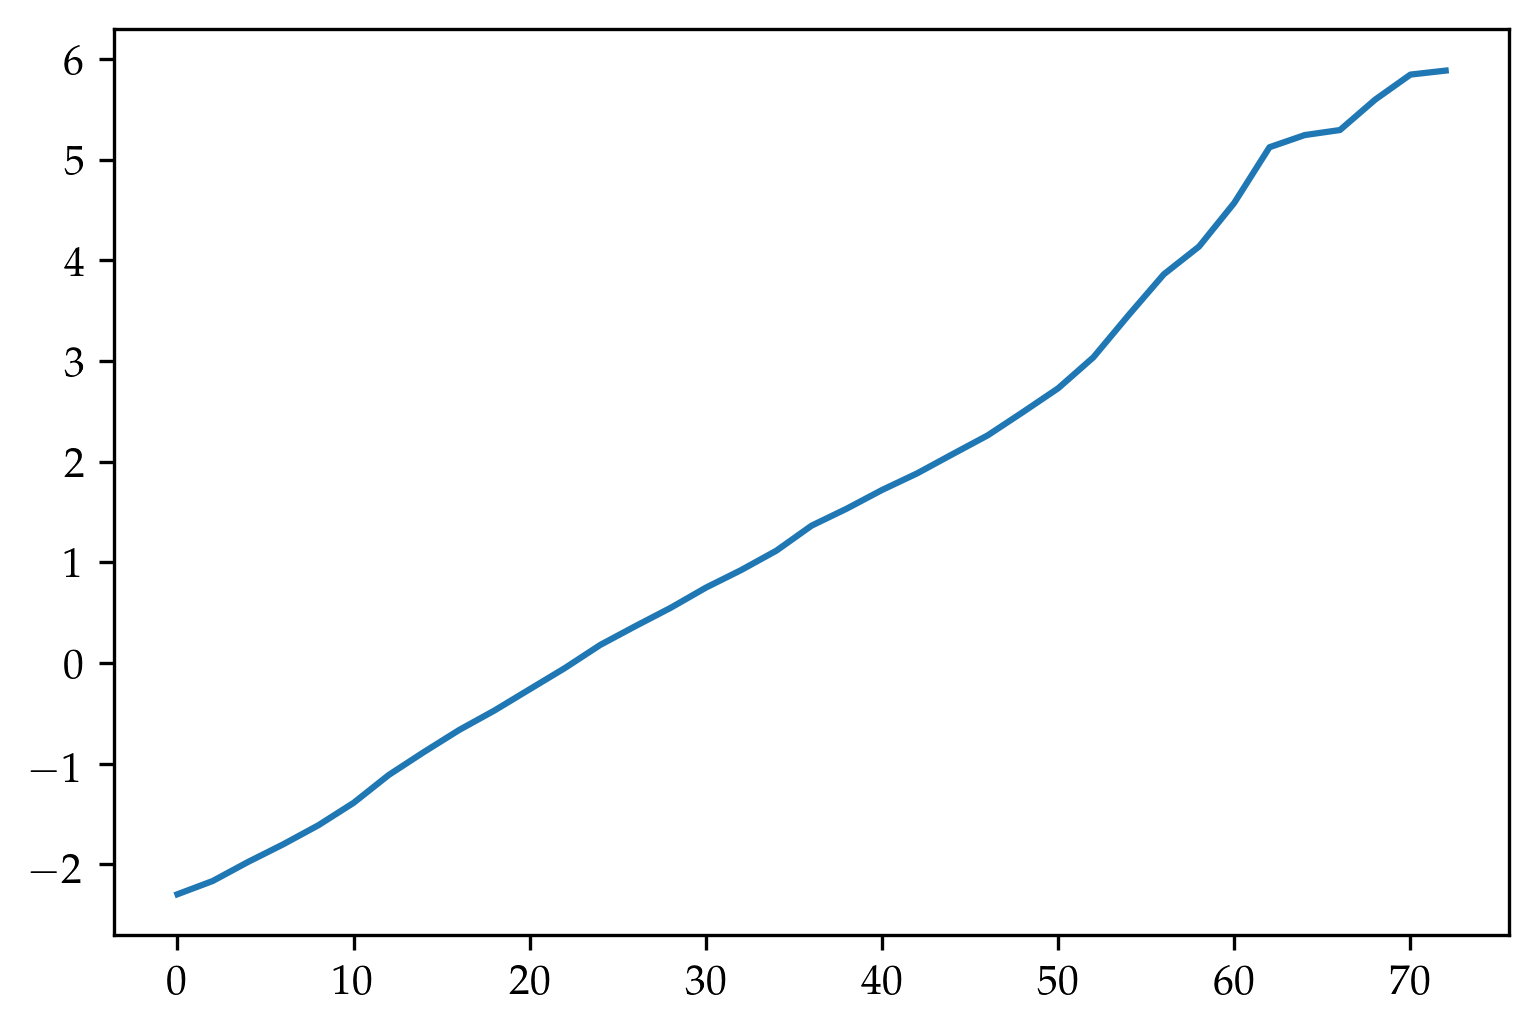

In [102]:
loc = 1
botfile = 'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Code/SWASH/1D/'
file_name = 'SWASH1D_loc'+str(loc)+'.bot'
cuts = [5947,5984],[6522,6569],[3325,3355]#5984

bot_hyb = np.loadtxt(path+file_name)
plt.plot(np.arange(len(-np.flip(bot_hyb)[cuts[loc-1][0]:cuts[loc-1][1]]))*2,-np.flip(bot_hyb)[cuts[loc-1][0]:cuts[loc-1][1]])

In [6]:
q = np.zeros([8,3])
for j in range(8):
    for i in range(3):
        q[j,i] = float(pd.read_csv('batch_output (16-03-21).csv',).q_mean[i+j*3])*1000
np.savetxt('../Overtopping results/q_bayonet.txt',q)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Text(0.5, 953.1213186350341, 'Scenario')

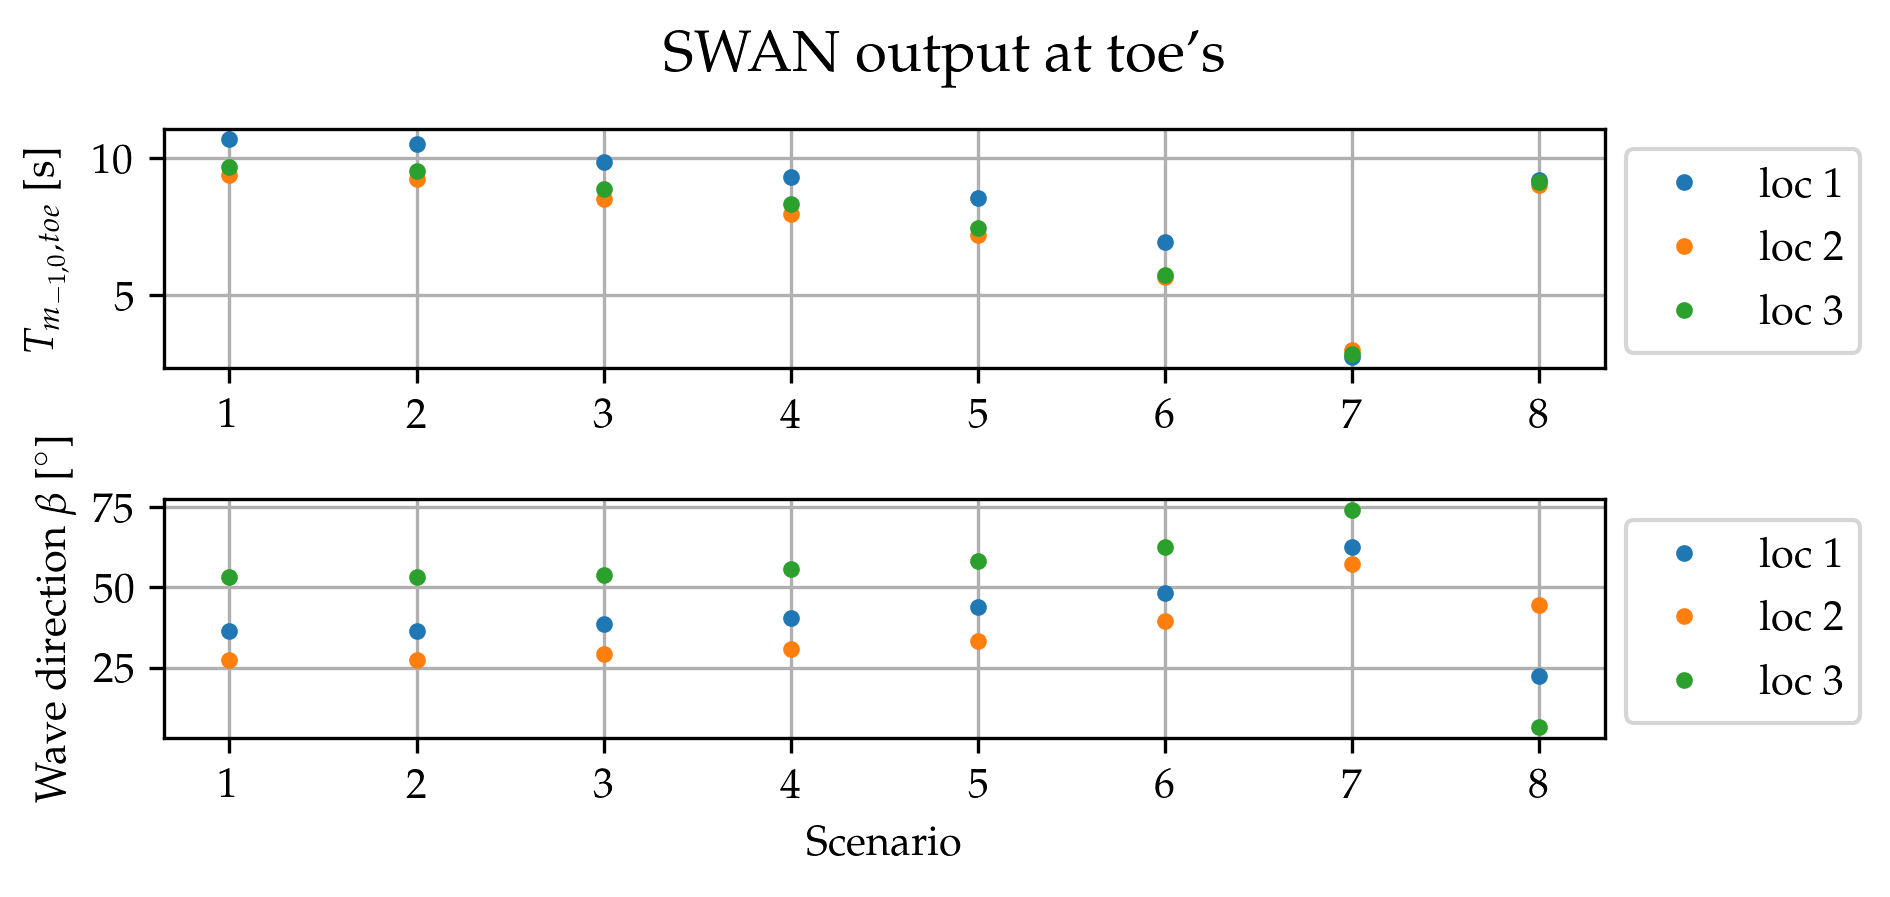

In [7]:
# plt.figure(figsize=[8*.8,6])
# plt.suptitle("SWAN output at toe's",fontsize=14)
# for i in range(4):
#     plt.subplot(4,1,i+1)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     loc_col = np.nan, 'tab:blue', 'tab:orange', 'tab:green'
#     for scenario in range(1,9):
#         for loc in range(1,4):

#             plt.ylabel(('$H_{m0}$ [m]', '$\\xi$ [-]', '$R_c$ [m]', '$\gamma_\\beta$ [m]')[i])
#             plot_vars = df.Hsig[0],iri,Rc[scenario-1][loc-1],gamma_beta
#             if (scenario == 1):
#                 plt.plot(scenario,plot_vars[i],'.',color=loc_col[loc],label="loc "+str(loc))
#             else:
#                 plt.plot(scenario,plot_vars[i],'.',color=loc_col[loc])
#     plt.title(['Significant waveheights ($H_{m0}$)','Iribarren number $\\xi$','Free board ($R_c$)','Oblique wave attack reduction factor ($\gamma_\\beta$)'][i])
#     plt.grid()
#     plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.xlabel('Scenarios')





surge_tide = [3.217853397,3.129784897,3.011694997,2.882887097,2.818109797,2.674751097,2.506357897,2.938605197]
dirs_norm = 45, 30, 63
head = '"TestName"', '"WaveDirection"', '"FrontWaterDepth"', '"ToeWaveHeight"', '"ToeWavePeriod"', '"ToeWaterDepth"', '"ToeWidth"', '"Roughness"', '"DownwardSlope"', '"UpwardSlope"', '"CrestFreeboard"', '"BermWidth"', '"BermWaterDepth"', '"BermSlope"', '"ArmourFreeboard"', '"CrestWidth"'
export_list = [head]
bound = [225,226,228],[265,280,260]

x1 = np.arange(0, bound[1][0] - bound[0][0],1)*2
x2 = np.arange(0, bound[1][1] - bound[0][1],1)*2
x3 = np.arange(0, bound[1][2] - bound[0][2],1)*2

d0 = np.zeros(3)
d1 = np.zeros(3)

plt.figure(figsize=[8*.8,6])
plt.suptitle("SWAN output at toe's",fontsize=14)
for j in range(2):
    bot_list = []
    Rc = np.zeros([8,3])
    plt.subplot(4,1,j+1)
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    loc_col = 'tab:blue', 'tab:orange', 'tab:green'
    plt.grid()
    for k in range(8):
        for i in range(3):# i = loc - 1
            botfile = 'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Code/SWASH/1D/SWASH1D_loc'+str(i+1)+'.bot'
            bot_list.append(-np.flip(np.loadtxt(botfile)))
    #         plt.plot([x1,x2,x3][i],bot_list[i][bound[0][i]:bound[1][i]],label=i)
    #         plt.legend()
            d0[i] = bot_list[i][bound[0][i]:bound[1][i]][-1]
            d1[i] = bot_list[i][bound[0][i]:bound[1][i]][0]
            l = [x1,x2,x3][i][-1]
            angle = np.arctan((d1[i] - d0[i])/l)
            cot = float(mat.cot(angle))

    #         if (k==0):
    #             plt.plot(np.arange(len(bot_list[i][bound[0][i]:bound[1][i]])),bot_list[i][bound[0][i]:bound[1][i]],label=i+1)

            if (k!=7):
                work_path = "../../Schenarios/Scenario_"+str(k+1)+"/SWAN/Output/"
            else:
                work_path = "../../Schenarios/Scenario_"+str(k+1)+"_alt/SWAN/Output/"
            project_name = "Eastbourne_01"

            head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(i+1)+".tab",sep='\s+',skiprows=4)).columns[1:]
            df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(i+1)+".tab",sep='\s+',skiprows=7, names= head)

            TestName = '"Loc'+str(i+1)+' schenario'+str(k+1)+'"'
            WaveDirection = np.abs(df.Dir[0] - (90+dirs_norm[i]))
            FrontWaterDepth = surge_tide[k] - d0[i]
    #         print(d1[i])
            ToeWaveHeight = df.Hsig[0]
            ToeWavePeriod = df.Tm_10[0]
            ToeWaterDepth = int(FrontWaterDepth*1e10)/1e10
            ToeWidth = 0
            Roughness = 0.9# mention this
            DownwardSlope = cot
            UpwardSlope = cot
            CrestFreeboard = d1[i] - surge_tide[k]
            BermWidth = 0
            BermWaterDepth = 0#int((surge_tide[k] - d0[i])*1e10)/1e10
            BermSlope = 0
            ArmourFreeboard = CrestFreeboard
            CrestWidth = 0
            Rc[k,i] = CrestFreeboard
            entry = TestName, WaveDirection, FrontWaterDepth, ToeWaveHeight, ToeWavePeriod, ToeWaterDepth, ToeWidth, Roughness, DownwardSlope, UpwardSlope, CrestFreeboard, BermWidth, BermWaterDepth, BermSlope, ArmourFreeboard, CrestWidth
            export_list.append(entry)
            
            plt.ylabel(('$T_{m_{-1,0},toe}$ [s]', 'Wave direction $\\beta$ [$^\circ$]')[j])
            plot_vars = ToeWavePeriod,WaveDirection
            if (j <2 ):
                plt.plot(k+1,plot_vars[j],'.',color=loc_col[i],label="loc "+str(1+i))
                if(k==0):
                    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
            else:
                plt.plot(k+1,plot_vars[j],'.',color=loc_col[i])
plt.xlabel('Scenario')

In [14]:
df.columns

Index(['Xp', 'Yp', 'Depth', 'Hsig', 'Wlen', 'Watlev', 'Period', 'Dir'], dtype='object')